# 고양이와 강아지 맞추기

## 1. 파일 불러오기

In [1]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'
base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [2]:
fnames_train = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname_train in fnames_train:
    src = os.path.join(original_dataset_dir, fname_train)
    dst = os.path.join(train_cats_dir, fname_train)
    shutil.copyfile(src, dst)

In [3]:
fnames_val = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname_val in fnames_val:
    src = os.path.join(original_dataset_dir, fname_val)
    dst = os.path.join(validation_cats_dir, fname_val)
    shutil.copyfile(src, dst)

In [4]:
fnames_test = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname_test in fnames_test:
    src = os.path.join(original_dataset_dir, fname_test)
    dst = os.path.join(test_cats_dir, fname_test)
    shutil.copyfile(src, dst)

In [5]:
fnames_train = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname_train in fnames_train:
    src = os.path.join(original_dataset_dir, fname_train)
    dst = os.path.join(train_dogs_dir, fname_train)
    shutil.copyfile(src, dst)

In [6]:
fnames_val = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname_val in fnames_val:
    src = os.path.join(original_dataset_dir, fname_val)
    dst = os.path.join(validation_dogs_dir, fname_val)
    shutil.copyfile(src, dst)

In [7]:
fnames_test = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname_test in fnames_test:
    src = os.path.join(original_dataset_dir, fname_test)
    dst = os.path.join(test_dogs_dir, fname_test)
    shutil.copyfile(src, dst)

In [8]:
print("훈련용 고양이 이미지 전체 개수: ", len(os.listdir(train_cats_dir)))
print("훈련용 강아지 이미지 전체 개수: ", len(os.listdir(train_dogs_dir)))
print("검증용 고양이 이미지 전체 개수: ", len(os.listdir(validation_cats_dir)))
print("검증용 강아지 이미지 전체 개수: ", len(os.listdir(validation_dogs_dir)))
print("테스트용 고양이 이미지 전체 개수: ", len(os.listdir(test_cats_dir)))
print("테스트용 강아지 이미지 전체 개수: ", len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수:  1000
훈련용 강아지 이미지 전체 개수:  1000
검증용 고양이 이미지 전체 개수:  500
검증용 강아지 이미지 전체 개수:  500
테스트용 고양이 이미지 전체 개수:  500
테스트용 강아지 이미지 전체 개수:  500


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, label_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', label_batch.shape)
    break


배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [16]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 117s 1s/step - loss: 0.6887 - accuracy: 0.5295 - val_loss: 0.6722 - val_accuracy: 0.6280
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.6517 - accuracy: 0.6305 - val_loss: 0.6413 - val_accuracy: 0.6290
Epoch 3/30
100/100 [==============================] - 113s 1s/step - loss: 0.6067 - accuracy: 0.6815 - val_loss: 0.6457 - val_accuracy: 0.6080
Epoch 4/30
100/100 [==============================] - 116s 1s/step - loss: 0.5716 - accuracy: 0.6960 - val_loss: 0.5865 - val_accuracy: 0.6740
Epoch 5/30
100/100 [==============================] - 112s 1s/step - loss: 0.5338 - accuracy: 0.7360 - val_loss: 0.5664 - val_accuracy: 0.6970
Epoch 6/30
100/100 [==============================] - 117s 1s/step - loss: 0.4960 - accuracy: 0.7580 - val_loss: 0.6

In [17]:
model.save('cats_and_dogs_small_1.h5')

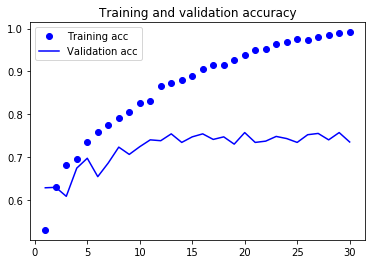

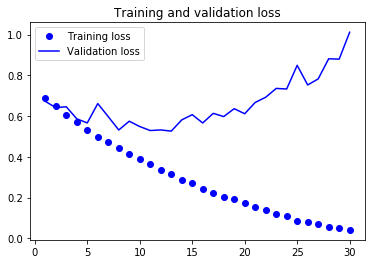

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()